In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,5:6] #Leptin
X2 = dataset[:,6:7] #Adiponectin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,7:8] #Resistin
X5 = dataset[:,2:3] #Glucose
X6 = dataset[:,4:5] #HOMA
X7 = dataset[:,8:9] #MCP.1
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)
X6 = normalization(X6)
X7 = normalization(X7)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')
input_layer_X6 = keras.layers.Input(shape=(1, ), name='input_layer_X6')
input_layer_X7 = keras.layers.Input(shape=(1, ), name='input_layer_X7')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6, input_layer_X7], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5, X6, X7], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 12ms/step - loss: 0.6953 - acc: 0.5652 - auc_1: 0.5693 - val_loss: 0.6519 - val_acc: 0.7083 - val_auc_1: 0.6893
Epoch 2/700
92/92 [==============================] - 0s 5ms/step - loss: 0.6663 - acc: 0.6848 - auc_1: 0.6714 - val_loss: 0.6259 - val_acc: 0.7083 - val_auc_1: 0.7107
Epoch 3/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6492 - acc: 0.6196 - auc_1: 0.6969 - val_loss: 0.6046 - val_acc: 0.7500 - val_auc_1: 0.7393
Epoch 4/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6281 - acc: 0.6739 - auc_1: 0.7162 - val_loss: 0.5827 - val_acc: 0.7083 - val_auc_1: 0.7500
Epoch 5/700
92/92 [==============================] - 0s 5ms/step - loss: 0.6072 - acc: 0.6522 - auc_1: 0.7374 - val_loss: 0.5536 - val_acc: 0.7500 - val_auc_1: 0.8107
Epoch 6/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5935 - acc: 0.6630 - auc_1: 0.7552 - val_loss

92/92 [==============================] - 0s 4ms/step - loss: 0.4196 - acc: 0.8152 - auc_1: 0.8905 - val_loss: 0.6710 - val_acc: 0.6667 - val_auc_1: 0.8429
Epoch 50/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4149 - acc: 0.7935 - auc_1: 0.8907 - val_loss: 0.5152 - val_acc: 0.7917 - val_auc_1: 0.8500
Epoch 51/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4351 - acc: 0.7826 - auc_1: 0.8795 - val_loss: 0.5876 - val_acc: 0.7083 - val_auc_1: 0.8500
Epoch 52/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4297 - acc: 0.7935 - auc_1: 0.8793 - val_loss: 0.5912 - val_acc: 0.7083 - val_auc_1: 0.8571
Epoch 53/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4208 - acc: 0.7717 - auc_1: 0.8848 - val_loss: 0.5816 - val_acc: 0.7083 - val_auc_1: 0.8571
Epoch 54/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4206 - acc: 0.7500 - auc_1: 0.8781 - val_loss: 0.5506 - val_acc: 0.7083 - val_auc_1: 0.8571
Epoch

92/92 [==============================] - 0s 5ms/step - loss: 0.3363 - acc: 0.8152 - auc_1: 0.9324 - val_loss: 0.5319 - val_acc: 0.7917 - val_auc_1: 0.8500
Epoch 98/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3431 - acc: 0.8152 - auc_1: 0.9212 - val_loss: 0.5287 - val_acc: 0.7500 - val_auc_1: 0.8429
Epoch 99/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3382 - acc: 0.8370 - auc_1: 0.9257 - val_loss: 0.6176 - val_acc: 0.7083 - val_auc_1: 0.8250
Epoch 100/700
92/92 [==============================] - 0s 5ms/step - loss: 0.3346 - acc: 0.8370 - auc_1: 0.9300 - val_loss: 0.6032 - val_acc: 0.7083 - val_auc_1: 0.8500
Epoch 101/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3377 - acc: 0.8370 - auc_1: 0.9279 - val_loss: 0.5975 - val_acc: 0.7083 - val_auc_1: 0.8357
Epoch 102/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3369 - acc: 0.8696 - auc_1: 0.9271 - val_loss: 0.6163 - val_acc: 0.6667 - val_auc_1: 0.8536
Ep

92/92 [==============================] - 0s 5ms/step - loss: 0.2452 - acc: 0.8587 - auc_1: 0.9655 - val_loss: 0.5779 - val_acc: 0.7083 - val_auc_1: 0.9107
Epoch 146/700
92/92 [==============================] - 0s 5ms/step - loss: 0.2406 - acc: 0.8913 - auc_1: 0.9681 - val_loss: 0.4490 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 147/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2427 - acc: 0.9239 - auc_1: 0.9645 - val_loss: 0.4545 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 148/700
92/92 [==============================] - 0s 5ms/step - loss: 0.2444 - acc: 0.8696 - auc_1: 0.9667 - val_loss: 0.4399 - val_acc: 0.7083 - val_auc_1: 0.9000
Epoch 149/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2195 - acc: 0.9022 - auc_1: 0.9738 - val_loss: 0.3905 - val_acc: 0.7500 - val_auc_1: 0.9143
Epoch 150/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2508 - acc: 0.9130 - auc_1: 0.9631 - val_loss: 0.4885 - val_acc: 0.7083 - val_auc_1: 0.9143


92/92 [==============================] - 1s 6ms/step - loss: 0.1702 - acc: 0.9022 - auc_1: 0.9824 - val_loss: 0.4103 - val_acc: 0.8333 - val_auc_1: 0.8964
Epoch 194/700
92/92 [==============================] - 1s 6ms/step - loss: 0.1854 - acc: 0.9239 - auc_1: 0.9790 - val_loss: 0.4734 - val_acc: 0.7500 - val_auc_1: 0.9071
Epoch 195/700
92/92 [==============================] - 1s 6ms/step - loss: 0.1724 - acc: 0.9130 - auc_1: 0.9836 - val_loss: 0.4199 - val_acc: 0.8333 - val_auc_1: 0.9143
Epoch 196/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1730 - acc: 0.9130 - auc_1: 0.9817 - val_loss: 0.3971 - val_acc: 0.8750 - val_auc_1: 0.9214
Epoch 197/700
92/92 [==============================] - 1s 7ms/step - loss: 0.1780 - acc: 0.9022 - auc_1: 0.9814 - val_loss: 0.4042 - val_acc: 0.8333 - val_auc_1: 0.9250
Epoch 198/700
92/92 [==============================] - 1s 7ms/step - loss: 0.1632 - acc: 0.9130 - auc_1: 0.9845 - val_loss: 0.3812 - val_acc: 0.9167 - val_auc_1: 0.9500


92/92 [==============================] - 0s 4ms/step - loss: 0.1277 - acc: 0.9457 - auc_1: 0.9910 - val_loss: 0.4393 - val_acc: 0.8333 - val_auc_1: 0.9500
Epoch 242/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1421 - acc: 0.9130 - auc_1: 0.9890 - val_loss: 0.3812 - val_acc: 0.7500 - val_auc_1: 0.9250
Epoch 243/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1551 - acc: 0.9022 - auc_1: 0.9852 - val_loss: 0.4149 - val_acc: 0.7917 - val_auc_1: 0.9286
Epoch 244/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1444 - acc: 0.9239 - auc_1: 0.9876 - val_loss: 0.3570 - val_acc: 0.8750 - val_auc_1: 0.9500
Epoch 245/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1426 - acc: 0.9239 - auc_1: 0.9869 - val_loss: 0.3735 - val_acc: 0.8750 - val_auc_1: 0.9571
Epoch 246/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1277 - acc: 0.9565 - auc_1: 0.9905 - val_loss: 0.4627 - val_acc: 0.7500 - val_auc_1: 0.9214


92/92 [==============================] - 0s 4ms/step - loss: 0.1048 - acc: 0.9565 - auc_1: 0.9945 - val_loss: 0.3608 - val_acc: 0.8333 - val_auc_1: 0.9429
Epoch 290/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0920 - acc: 0.9674 - auc_1: 0.9967 - val_loss: 0.4636 - val_acc: 0.7917 - val_auc_1: 0.9357
Epoch 291/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1224 - acc: 0.9457 - auc_1: 0.9919 - val_loss: 0.3886 - val_acc: 0.7917 - val_auc_1: 0.9429
Epoch 292/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0906 - acc: 0.9674 - auc_1: 0.9964 - val_loss: 0.3763 - val_acc: 0.8333 - val_auc_1: 0.9429
Epoch 293/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0950 - acc: 0.9565 - auc_1: 0.9952 - val_loss: 0.4613 - val_acc: 0.8333 - val_auc_1: 0.9536
Epoch 294/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1050 - acc: 0.9457 - auc_1: 0.9943 - val_loss: 0.3874 - val_acc: 0.8333 - val_auc_1: 0.9536


92/92 [==============================] - 0s 5ms/step - loss: 0.0610 - acc: 0.9783 - auc_1: 0.9981 - val_loss: 0.4338 - val_acc: 0.8333 - val_auc_1: 0.9429
Epoch 338/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1048 - acc: 0.9565 - auc_1: 0.9936 - val_loss: 0.4745 - val_acc: 0.8333 - val_auc_1: 0.9357
Epoch 339/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0513 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 0.4878 - val_acc: 0.8333 - val_auc_1: 0.9250
Epoch 340/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0533 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 0.4070 - val_acc: 0.8750 - val_auc_1: 0.9429
Epoch 341/700
92/92 [==============================] - 1s 6ms/step - loss: 0.0543 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 0.4346 - val_acc: 0.8333 - val_auc_1: 0.9393
Epoch 342/700
92/92 [==============================] - 1s 6ms/step - loss: 0.0810 - acc: 0.9674 - auc_1: 0.9971 - val_loss: 0.5866 - val_acc: 0.7917 - val_auc_1: 0.9179


92/92 [==============================] - 0s 5ms/step - loss: 0.0426 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 0.4971 - val_acc: 0.7500 - val_auc_1: 0.9250
Epoch 386/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0439 - acc: 0.9783 - auc_1: 0.9986 - val_loss: 0.5428 - val_acc: 0.7500 - val_auc_1: 0.9214
Epoch 387/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0562 - acc: 0.9674 - auc_1: 0.9990 - val_loss: 0.5070 - val_acc: 0.7500 - val_auc_1: 0.9321
Epoch 388/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0599 - acc: 0.9674 - auc_1: 0.9986 - val_loss: 0.4644 - val_acc: 0.7917 - val_auc_1: 0.9250
Epoch 389/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0680 - acc: 0.9674 - auc_1: 0.9967 - val_loss: 0.4374 - val_acc: 0.7500 - val_auc_1: 0.9250
Epoch 390/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0278 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.5682 - val_acc: 0.7917 - val_auc_1: 0.9214


92/92 [==============================] - 0s 5ms/step - loss: 0.0378 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 0.5911 - val_acc: 0.7917 - val_auc_1: 0.8964
Epoch 434/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0174 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.6316 - val_acc: 0.7500 - val_auc_1: 0.9143
Epoch 435/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0195 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.6200 - val_acc: 0.7917 - val_auc_1: 0.9214
Epoch 436/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0145 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.6114 - val_acc: 0.7500 - val_auc_1: 0.9214
Epoch 437/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0192 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.6774 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 438/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0122 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.6835 - val_acc: 0.7500 - val_auc_1: 0.9071


92/92 [==============================] - 1s 7ms/step - loss: 0.0079 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.6558 - val_acc: 0.7917 - val_auc_1: 0.9143
Epoch 482/700
92/92 [==============================] - 1s 7ms/step - loss: 0.0085 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.7970 - val_acc: 0.7917 - val_auc_1: 0.8821
Epoch 483/700
92/92 [==============================] - 1s 7ms/step - loss: 0.0073 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.7900 - val_acc: 0.7917 - val_auc_1: 0.9000
Epoch 484/700
92/92 [==============================] - 1s 7ms/step - loss: 0.0061 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.7723 - val_acc: 0.7917 - val_auc_1: 0.9071
Epoch 485/700
92/92 [==============================] - 1s 7ms/step - loss: 0.0110 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.7509 - val_acc: 0.7500 - val_auc_1: 0.9071
Epoch 486/700
92/92 [==============================] - 1s 7ms/step - loss: 0.0059 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.7689 - val_acc: 0.7917 - val_auc_1: 0.9071


92/92 [==============================] - 0s 5ms/step - loss: 0.0035 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9232 - val_acc: 0.7917 - val_auc_1: 0.8643
Epoch 530/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0031 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9139 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 531/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9244 - val_acc: 0.7917 - val_auc_1: 0.8643
Epoch 532/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0035 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8691 - val_acc: 0.7917 - val_auc_1: 0.8786
Epoch 533/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0035 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9970 - val_acc: 0.7917 - val_auc_1: 0.8393
Epoch 534/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0036 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9046 - val_acc: 0.7917 - val_auc_1: 0.8786


92/92 [==============================] - 0s 4ms/step - loss: 0.0024 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9738 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 578/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0021 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9726 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0025 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9404 - val_acc: 0.7917 - val_auc_1: 0.8571
Epoch 580/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1160 - acc: 0.9783 - auc_1: 0.9840 - val_loss: 0.8524 - val_acc: 0.8333 - val_auc_1: 0.8321
Epoch 581/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0154 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8601 - val_acc: 0.7917 - val_auc_1: 0.8571
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0886 - acc: 0.9674 - auc_1: 0.9962 - val_loss: 1.4666 - val_acc: 0.7500 - val_auc_1: 0.8143


92/92 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9281 - val_acc: 0.7917 - val_auc_1: 0.8643
Epoch 626/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9282 - val_acc: 0.7917 - val_auc_1: 0.8679
Epoch 627/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.8997 - val_acc: 0.7917 - val_auc_1: 0.8643
Epoch 628/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9286 - val_acc: 0.7917 - val_auc_1: 0.8679
Epoch 629/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0011 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9475 - val_acc: 0.7917 - val_auc_1: 0.8500
Epoch 630/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9544 - val_acc: 0.7917 - val_auc_1: 0.8679


92/92 [==============================] - 0s 4ms/step - loss: 0.0011 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9586 - val_acc: 0.8333 - val_auc_1: 0.8643
Epoch 674/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0010 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9578 - val_acc: 0.8333 - val_auc_1: 0.8643
Epoch 675/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0010 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9641 - val_acc: 0.8333 - val_auc_1: 0.8643
Epoch 676/700
92/92 [==============================] - 0s 3ms/step - loss: 9.9453e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9651 - val_acc: 0.8333 - val_auc_1: 0.8643
Epoch 677/700
92/92 [==============================] - 0s 3ms/step - loss: 9.6764e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9605 - val_acc: 0.8333 - val_auc_1: 0.8607
Epoch 678/700
92/92 [==============================] - 0s 3ms/step - loss: 9.4875e-04 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 0.9684 - val_acc: 0.8333 - val_au

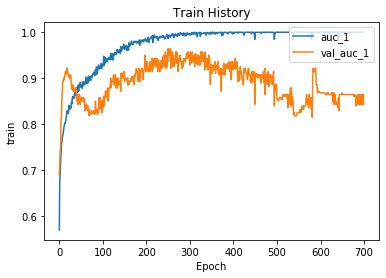

[array([[-0.48630065,  1.5294012 , -0.04040305, -1.1363782 , -0.10686349,
        -0.18075305, -0.9371585 ,  1.3481778 , -0.5598808 ],
       [ 0.01180527, -0.3243049 , -0.38173077, -1.1760089 ,  0.8601171 ,
        -0.2021206 ,  0.7577524 , -1.662932  ,  0.05695267],
       [ 0.40160123, -0.16567522,  1.0133964 ,  1.0030876 , -0.5924297 ,
        -1.4307861 ,  1.2612592 ,  0.3781774 , -0.35437852],
       [-0.56808084,  2.5667427 , -2.148373  ,  0.42424297, -2.8079393 ,
         0.29319757, -1.1081934 ,  0.16034454,  1.6920391 ],
       [-1.6947368 ,  0.3391665 , -1.2425306 , -1.1083585 , -0.723455  ,
        -0.30786443,  0.5615693 ,  0.01285276,  1.5844867 ],
       [ 0.97621197, -2.1168306 ,  0.5549257 ,  3.0624964 ,  0.24003088,
        -1.9447823 , -1.626367  , -1.1427323 ,  1.34224   ],
       [ 0.31022733, -0.07142082, -0.39479095, -0.47536677,  0.7905558 ,
        -0.0880537 , -0.57536876, -1.1794604 ,  0.38904393]],
      dtype=float32), array([ 0.08789897, -0.2865126 ,  0.14

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5, X6, X7])
print(predictions)

[[1.6910801e-05]
 [9.9967122e-01]
 [9.9792308e-01]
 [1.3123153e-05]
 [3.7768688e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9998987e-01]
 [9.9989140e-01]
 [7.8346948e-06]
 [7.4069190e-04]
 [1.0000000e+00]
 [8.3276493e-05]
 [2.4457753e-03]
 [9.9988878e-01]
 [4.5703613e-04]
 [9.9945182e-01]
 [9.9937868e-01]
 [9.9924111e-01]
 [5.7136080e-05]
 [6.8859568e-10]
 [1.9553339e-03]
 [9.9999499e-01]
 [9.9996853e-01]
 [9.9991977e-01]
 [9.9962592e-01]
 [9.9779201e-01]
 [3.1420271e-04]
 [1.0000000e+00]
 [1.0535259e-04]
 [5.2878598e-04]
 [2.5932341e-06]
 [9.5567986e-05]
 [3.3156516e-07]
 [1.0000000e+00]
 [9.9999654e-01]
 [9.9970078e-01]
 [9.9817443e-01]
 [9.9999952e-01]
 [9.9978691e-01]
 [9.9999845e-01]
 [7.7734498e-04]
 [3.0966364e-03]
 [4.1690779e-05]
 [9.9820817e-01]
 [9.9677366e-01]
 [9.9999321e-01]
 [9.9864286e-01]
 [7.0504670e-05]
 [6.9421018e-04]
 [9.9856442e-01]
 [2.4818347e-04]
 [2.5588834e-05]
 [1.5919069e-06]
 [2.7809246e-04]
 [3.7319313e-03]
 [1.0000000e+00]
 [1.4890790e-0